In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import re
import numpy as np 
import glob 
import warnings 
from scipy.stats import norm
from IPython.display import display, HTML
import scipy
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
sns.set()

In [2]:
leagues = ['EPL','La_Liga','Bundesliga','Serie_A','Ligue_1','RFPL']

In [3]:
driver = webdriver.Chrome(r"C:/chromedriver_win32/chromedriver.exe")

In [4]:
def getTeamStats(leagues):
    #Create the receiving dataFrame
    dfOut= []
    #Go through every league
    for league in leagues:
        #Establish Connection
        driver.get('https://understat.com/league/'+league)
        #Get the relevant object
        base = driver.find_element_by_id('league-chemp')
        #Get Rows
        rows = base.find_elements_by_tag_name('tr')
        #Create a list to receive values
        values=[]
        #Go through every row
        for item in range(1,len(rows)):
            #Get elements from the row
            row = rows[item].find_elements_by_tag_name('td')
            #Add those elements to the values list
            values.append([row[i].text for i in range(1,len(row))])
            #Go through every value and append it to the dataframe value by value
            for j in range(0,len(values)):
                dfOut.append([league,values[j][0],values[j][1],values[j][2],values[j][3],values[j][4],values[j][5],values[j][6],
                             values[j][7],values[j][8],values[j][9],values[j][10]])
    return dfOut

#Run the function
dfOut = getTeamStats(leagues=leagues)
#Convert to dataframe
dfOut = pd.DataFrame(dfOut,columns=['league','name','matches','wins','draws','losses','goals_for','goals_against','points','xG','xGA','xPTS'])
#Drop duplicate rows created
dfOut = dfOut.drop_duplicates()

In [3]:
data = []
driver = webdriver.Chrome(r"C:/chromedriver_win32/chromedriver.exe")

for i in teams:
    
    driver.get('https://understat.com/team/'+i+'/2018')
    print(i)
    baseTable = driver.find_element_by_id('team-players')
    tableRows = baseTable.find_elements_by_tag_name('tr')
    for item in range(1,len(tableRows)):
        row = tableRows[item].find_elements_by_tag_name('td')
        Team = i
        name = row[1].text
        pos = row[2].text
        apps = row[3].text
        Min = row[4].text
        goals = row[5].text
        assists = row[6].text
        sh90 = row[7].text
        kp90 = row[8].text
        xg = row[9].text
        xa = row[10].text
        xg90 = row[11].text
        xa90 = row[12].text
        data.append([Team,name,pos,apps,Min,goals,assists,sh90,kp90,xg,xa,xg90,xa90])


    
df = pd.DataFrame(data)
df = df.rename(columns={0:'Team',1:"Name",2: "Position",3: "Apps", 4:"Min", 5:"Goals_Scored"
                , 6:"Assists",7: "Sh90",8: "KP90",9: "xG",10: "xA"
                , 11:"xG90",12: "xA90"})

Manchester_City
Liverpool
Tottenham
Manchester_United
Arsenal
Chelsea
Wolverhampton_Wanderers
Watford
West_Ham
Everton
Leicester
Bournemouth
Crystal_Palace
Newcastle_United
Brighton
Burnley
Southampton
Cardiff
Fulham
Huddersfield
Barcelona
Atletico_Madrid
Real_Madrid
Getafe
Alaves
Sevilla
Valencia
Real_Betis
Real_Sociedad
Eibar
Leganes
Athletic_Club
Espanyol
Girona
Levante
Real_Valladolid
Celta_Vigo
Villarreal
Rayo_Vallecano
SD_Huesca


In [15]:
df['Goals_Scored'] = pd.to_numeric(df['Goals_Scored'])
df['Sh90'] = pd.to_numeric(df['Sh90'])
df['Apps'] = pd.to_numeric(df['Apps'])

In [16]:
len(df.loc[21]['Name'])
df_teams = df[df.Name =='']

df_players = df[df.Name != '']

In [17]:
data = df_players[(df_players.Apps > 10) & (df_players['Position'].isin(['F', 'F M']))]

In [60]:
data.head()

,Team,Name,Position,Apps,Min,Goals_Scored,Assists,Sh90,KP90,xG,xA,xG90,xA90
0,Manchester_City,Sergio Agüero,F,25.00,1879,18,6,4.41,1.20,17.10-0.90,3.78-2.22,0.82,0.18
1,Manchester_City,Raheem Sterling,F M,26.00,2093,12,8,2.24,2.24,11.25-0.75,9.12+1.12,0.48,0.39
2,Manchester_City,Leroy Sané,F,24.00,1506,8,9,2.51,2.03,6.00-2.00,6.91-2.09,0.36,0.41
4,Manchester_City,Riyad Mahrez,F M,23.00,1062,6,2,3.73,1.44,6.21+0.21,2.51+0.51,0.53,0.21
5,Manchester_City,Gabriel Jesus,F,22.00,822,6,2,3.83,1.86,8.98+2.98,2.54+0.54,0.98,0.28


In [44]:
df_players['Position'].unique()

array(['F', 'F M', 'M', 'D', 'D M', 'GK', 'S', 'D F M'], dtype=object)

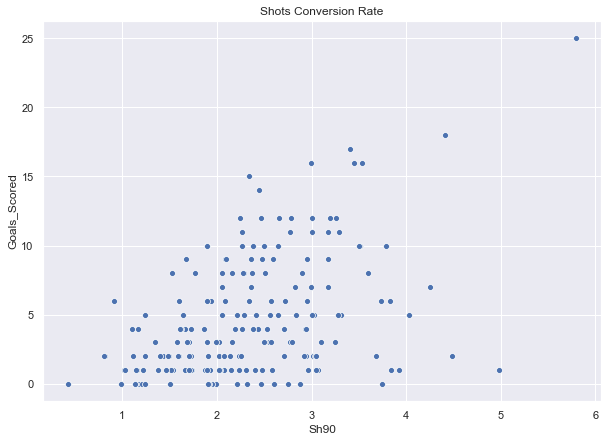

In [24]:
plt.figure(figsize=(10,7))
plt.title('Shots Conversion Rate')
plt.ylabel('Shots Per 90 Minutes')
plt.xlabel('Goals')
sns.scatterplot(data=data,x=data['Sh90'],y =data['Goals_Scored'])